In [1]:
# NetCDF packages
import netCDF4
from netCDF4 import Dataset
import xarray
import xarray as xr

# Matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection, PolyCollection
%matplotlib inline

# Cartopy
import cartopy.feature
from cartopy.mpl.patch import geos_to_path
import cartopy.crs as ccrs

# MetPy packages
import metpy.calc as mpcalc
from metpy.testing import get_test_data
from metpy.units import units

# Scientific
import numpy as np
import pandas as pd

import plotly.plotly as py
import plotly.tools as tls


import itertools


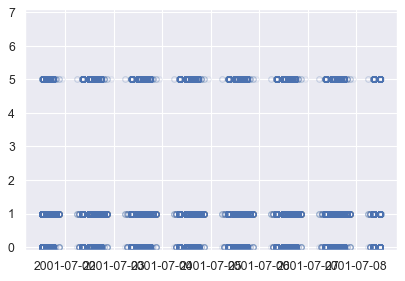

In [8]:
ds = xr.open_dataset('../datasets/proposed_standard/salinity_4.nc',decode_times=True)
from matplotlib.pyplot import figure
import seaborn
fig = figure(num=None, dpi=80, facecolor='w', edgecolor='k')
seaborn.set()
temp = ds.where(8 > ds['qc'],drop=True)
plt.plot_date(x=temp['time'],y=temp['qc'].values,xdate=True, 
              markerfacecolor="None",ms=5, alpha=0.05)
plt.ylim(-0.1,7.1)
plt.show()


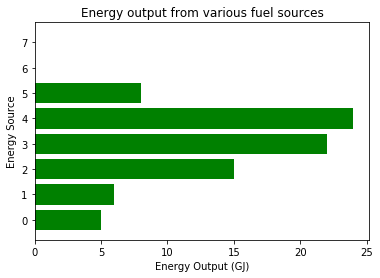

In [3]:
x = [0,1,2,3,4,5,6,7]


energy = [5, 6, 15, 22, 24, 8,0,0]
variance = [1, 2, 7, 4, 2, 3,0,0]

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, energy, color='green')
plt.ylabel("Energy Source")
plt.xlabel("Energy Output (GJ)")
plt.title("Energy output from various fuel sources")

plt.yticks(x_pos, x)

plt.show()


Text(0, 0.5, 'DART QC Values')

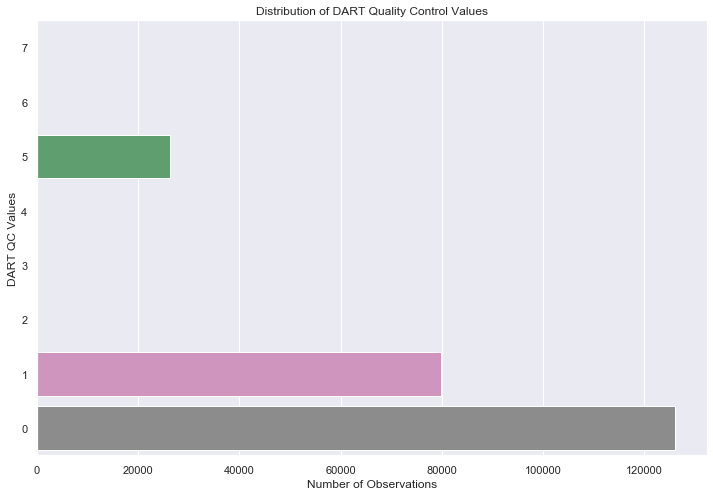

In [38]:
import seaborn
plt.figure(figsize=(12,8))
seaborn.set()
temp = ds.where(8 > ds['qc'],drop=True)
seaborn.countplot(y=temp['qc'].values.T[0],order=[7,6,5,4,3,2,1,0])
plt.title("Distribution of DART Quality Control Values")
plt.xlabel('Number of Observations')
plt.ylabel('DART QC Values')

In [19]:
type(ds['qc'].values.data)

memoryview

In [24]:
ds['qc'].values.T

array([[1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [17]:
temp = ds.where([123,12] not in ds['obs'],drop=True)
temp

TypeError: cond argument is True but must be a <class 'xarray.core.dataset.Dataset'> or <class 'xarray.core.dataarray.DataArray'>

ValueError: dimensions or multi-index levels ['qc'] do not exist

In [27]:
ds

<xarray.Dataset>
Dimensions:         (copy: 3, obs: 232323, qc_copy: 1)
Coordinates:
    time            (obs) datetime64[ns] ...
    lon             (obs) float64 ...
    lat             (obs) float64 ...
    vertical        (obs) float64 ...
  * qc_copy         (qc_copy) int32 1
Dimensions without coordinates: copy, obs
Data variables:
    observations    (obs, copy) float64 ...
    error_variance  (obs) float64 ...
    qc              (obs, qc_copy) int32 1 1 1 1 1 1 1 1 5 ... 1 1 1 1 1 1 1 1 1
    obs_key         (obs) int32 ...
    list_of_groups  (obs) int32 ...
Attributes:
    featureType:    point
    title:          Restructured netCDF file from Nancy
    author:         Jason Ngo, SIParCS Intern
    source:         Nancy Collins, NCAR|UCAR
    conventions:    CF-1.7
    creation_date:  YYYY MM DD HH MM SS = 2019 06 30 16 05 57

In [58]:
list_of_unchecked_checkboxes = [1, 2, 3, 4, 5, 6, 7, 8]
if 8 not in list_of_unchecked_checkboxes:
    print(ds)
for i in list_of_unchecked_checkboxes:
    ds = ds.where(i != ds['qc'].T[0], drop=True)
ds.squeeze('qc_copy')

<xarray.Dataset>
Dimensions:         (copy: 3, obs: 126161)
Coordinates:
    time            (obs) datetime64[ns] 2001-07-01T12:35:00 ... 2001-07-08T11:50:28.000004
    lon             (obs) float64 106.2 125.7 104.4 104.8 ... 99.15 99.52 99.52
    lat             (obs) float64 75.81 71.81 75.81 75.81 ... 14.12 13.83 13.54
    vertical        (obs) float64 2.5e-05 2.5e-05 2.5e-05 ... 2.5e-05 2.5e-05
    qc_copy         int32 1
Dimensions without coordinates: copy, obs
Data variables:
    observations    (obs, copy) float64 10.86 10.83 0.0001 ... 8.542 0.0001
    error_variance  (obs) float64 0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001
    qc              (obs) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    obs_key         (obs) float64 64.0 65.0 70.0 ... 3.313e+04 3.314e+04
    list_of_groups  (obs) object [-2147483647] [-2147483647] ... [-2147483647]
Attributes:
    featureType:    point
    title:          Restructured netCDF file from Nancy
    author:         Jason Ngo, 

In [45]:
ds['observations']

<xarray.DataArray 'observations' (obs: 126161, copy: 3, qc_copy: 1)>
array([[[1.085598e+01],
        [1.083386e+01],
        [1.000000e-04]],

       [[9.558633e+00],
        [9.548540e+00],
        [1.000000e-04]],

       ...,

       [[8.556287e+00],
        [8.541899e+00],
        [1.000000e-04]],

       [[8.534402e+00],
        [8.541899e+00],
        [1.000000e-04]]])
Coordinates:
    time      (obs) datetime64[ns] 2001-07-01T12:35:00 ... 2001-07-08T11:50:28.000004
    lon       (obs) float64 106.2 125.7 104.4 104.8 ... 99.52 99.15 99.52 99.52
    lat       (obs) float64 75.81 71.81 75.81 75.81 ... 14.12 14.12 13.83 13.54
    vertical  (obs) float64 2.5e-05 2.5e-05 2.5e-05 ... 2.5e-05 2.5e-05 2.5e-05
  * qc_copy   (qc_copy) int32 1
Dimensions without coordinates: obs, copy
Attributes:
    long_name:            Observation data
    ancillary_variables:  error_variance truth obs_type

In [46]:
ds = xr.open_dataset('../datasets/proposed_standard/salinity_4.nc',decode_times=True)
ds

<xarray.Dataset>
Dimensions:         (copy: 3, obs: 232323, qc_copy: 1)
Coordinates:
    time            (obs) datetime64[ns] ...
    lon             (obs) float64 ...
    lat             (obs) float64 ...
    vertical        (obs) float64 ...
  * qc_copy         (qc_copy) int32 1
Dimensions without coordinates: copy, obs
Data variables:
    observations    (obs, copy) float64 ...
    error_variance  (obs) float64 ...
    qc              (obs, qc_copy) int32 ...
    obs_key         (obs) int32 ...
    list_of_groups  (obs) int32 ...
Attributes:
    featureType:    point
    title:          Restructured netCDF file from Nancy
    author:         Jason Ngo, SIParCS Intern
    source:         Nancy Collins, NCAR|UCAR
    conventions:    CF-1.7
    creation_date:  YYYY MM DD HH MM SS = 2019 06 30 16 05 57

In [50]:
ds['qc'].values.T[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [54]:
ds['qc'].T[0]

<xarray.DataArray 'qc' (obs: 126161)>
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
    time      (obs) datetime64[ns] 2001-07-01T12:35:00 ... 2001-07-08T11:50:28.000004
    lon       (obs) float64 106.2 125.7 104.4 104.8 ... 99.52 99.15 99.52 99.52
    lat       (obs) float64 75.81 71.81 75.81 75.81 ... 14.12 14.12 13.83 13.54
    vertical  (obs) float64 2.5e-05 2.5e-05 2.5e-05 ... 2.5e-05 2.5e-05 2.5e-05
    qc_copy   int32 1
Dimensions without coordinates: obs
Attributes:
    long_name:            quality control values
    ancillary_variables:  qc_copy
    flag_masks:           [0 1 2 3 4 5 6]
    flag_meanings:        assimilated evaluated assim_failed_postForwardOp ev...